In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
from env import get_db_url

In [3]:
n_trials = 10000
np.random.seed(24)

# 1

A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

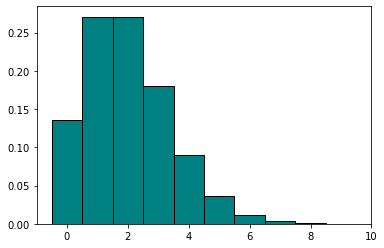

In [4]:
dist = stats.poisson(2)
x = range(10)
y = dist.pmf(x)
plt.bar(x, y, edgecolor='black', color='teal', width=1);

In [5]:
num_of_cars = np.array(dist.rvs(n_trials))

- What is the probability that no cars drive up in the noon hour?

In [6]:
# Experimental
(num_of_cars == 0).mean()

0.138

In [7]:
# Theoretical
dist.pmf(0)

0.1353352832366127

- What is the probability that 3 or more cars come through the drive through?

In [8]:
# Experimental
(num_of_cars >= 3).mean()

0.3212

In [9]:
# Theoretical
dist.sf(2)

0.32332358381693654

- How likely is it that the drive through gets at least 1 car?

In [10]:
# Experimental
(num_of_cars > 0).mean()

0.862

In [11]:
# Theoretical
dist.sf(0)

0.8646647167633873

# 2

Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [12]:
grades_dist = stats.norm(3.0, 0.3)

In [13]:
grades_sim = grades_dist.rvs(n_trials)

- What grade point average is required to be in the top 5% of the graduating class?

In [14]:
# Experimental
np.percentile(grades_sim, 95)

3.4984462616594385

In [15]:
# Theoretical
grades_dist.isf(0.05)

3.4934560880854417

- What GPA constitutes the bottom 15% of the class?

In [16]:
# Experimental
np.percentile(grades_sim, 15)

2.6780320346656667

In [17]:
# Theoretical
grades_dist.ppf(0.15)

2.689069983151863

- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [18]:
# Experimental
np.percentile(grades_sim, 30)

2.8386513379763243

In [19]:
# Theoretical
# The range is 0.0 - 2.84
grades_dist.ppf(0.3)

2.842679846187588

- If I have a GPA of 3.5, what percentile am I in?

In [22]:
# Experimental
(grades_sim >= 3.5).mean()

0.0494

In [23]:
# Theoretical
# Top 33%
grades_dist.sf(3.5)

0.0477903522728147

# 3

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [35]:
n_trials = 4326
click_through_rate = 0.02

click_through_dist = stats.binom(n_trials, click_through_rate)

In [40]:
click_through_sim = click_through_dist.rvs(n_trials)

In [41]:
# Experimental
(click_through_sim >= 97).mean()

0.13754045307443366

In [42]:
# Theoretical
click_through_dist.sf(96)

0.13975823631416445

# 4

You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

- What is the probability that at least one of your first 60 answers is correct?